<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/1.TF-Intro/TF_Intro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

##Previous versions

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),                       
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5032
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3766
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3372
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134
Epoch 5/5
313/313 [==============================] - 0s 991us/step - loss: 0.3536


0.35363680124282837

##Adding Convlutional and Pooling Layers

In [6]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_lables) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images.reshape(60000, 28, 28, 1), test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255.0, test_images/255.0

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax),                         
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

model.fit(train_images, train_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


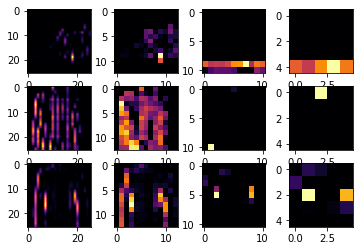

In [11]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

##Exercises

In [13]:
class Mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.22 ):
      print('\nReached required loss 0.22, stopping training.')
      self.model.stop_training = True

In [15]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_lables) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images.reshape(60000, 28, 28, 1), test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255.0, test_images/255.0

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

callback = Mycallbacks()
model.fit(train_images, train_labels, epochs=5, callbacks=[callback])
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

##Visualizing Convolutions

In [16]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

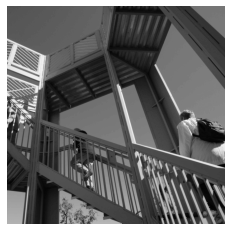

In [17]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [18]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [33]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 0.1

In [34]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

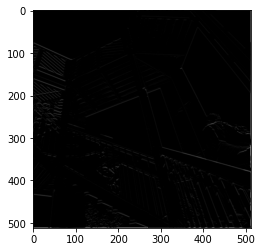

In [35]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

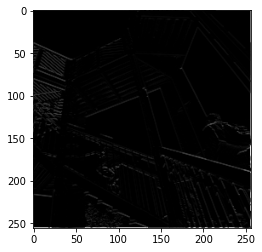

In [36]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    

##Improving MNIST - Exercise 

In [2]:
import tensorflow as tf

class Mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.998 ):
      print('\nReached 99.8% accuracy so cancelling training!')
      self.model.stop_training = True


callback = Mycallbacks()


mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images, test_images = training_images.reshape(60000, 28, 28, 1), test_images.reshape(10000, 28, 28, 1)
training_images, test_images = training_images/255.0, test_images/255.0


model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10, activation=tf.nn.softmax),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15, callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1426 - accuracy: 0.9564
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9852
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9907
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.007